# Graph Cluster

In [12]:
import networkx as nx
import random

## (1) Implement K-Spanning Tree (including Prim's algorithm) from scratch. Assume the weights represent similarity and not distance

### Implementation

In [13]:
# Prim's algorim for minimum spanning tree of graph G
def mst_prim(G):

    mst = nx.Graph()

    #list of nodes remaining    
    nodes = list(G.nodes)

    #pick first node
    node = nodes.pop(0)

    #add node to MST
    mst.add_node(node)

    while True:    

        mst_nodes = list(mst.nodes)

        #get list edges of nodes in MST
        edge_list = list(G.edges(mst_nodes, data=True))

        #sort the list of edges
        sorted_edge_list = sorted(edge_list, key=lambda edge: edge[2]['weight'])

        #go through each edge to find minimum edge that doesn't form a cycle
        for edge in sorted_edge_list:
            edge_src = edge[0]
            edge_trg = edge[1]
            edge_wght = edge[2]['weight']

            #check if we have visited this node already
            if not (mst.has_node(edge_trg)):
                
                #add edge to mst
                mst.add_edge(edge_src, edge_trg, weight=edge_wght)
                nodes.remove(edge_trg)
                break

        if len(nodes) == 0:
            break
    
    return (mst)




In [14]:
# return a k Spannig tree of size K, 
# assuming weights are similarity between nodes
def k_spanning_tree(G, k):
    mst = mst_prim(G)
    edge_list = list(mst.edges(data=True))
    
    #sort the list of edges in increasing order
    sorted_edge_list = sorted(edge_list, key=lambda edge: edge[2]['weight'])

    #remove first k-1 edges with minimum similarity 
    for i in range(k-1):
        edge = sorted_edge_list.pop(0)
        mst.remove_edge(edge[0], edge[1])
    
    return (mst)

### Test implementation

{(1, 2): Text(0.19074120787979734, 0.669798279430289, "{'weight': 7}"),
 (1, 3): Text(0.015425871934398344, 0.23578703808478446, "{'weight': 2}"),
 (1, 4): Text(0.4133314034945146, 0.2789966679583342, "{'weight': 4}"),
 (2, 4): Text(0.09665131865192436, 0.264212961915216, "{'weight': 5}"),
 (2, 3): Text(-0.3012542129081919, 0.22100333204166622, "{'weight': 3}"),
 (3, 4): Text(-0.07866401729347464, -0.16979827943028852, "{'weight': 2}"),
 (3, 5): Text(-0.35036196501311806, -0.6065039546519191, "{'weight': 6}"),
 (4, 5): Text(0.04754356654699819, -0.5632943247783694, "{'weight': 4}")}

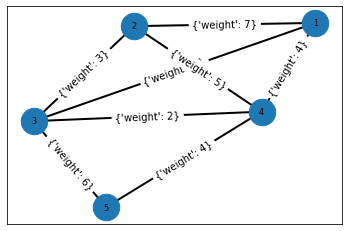

In [15]:
edge_list = [(1,2,7), (1,3,2), (1,4,4), (2,4,5), (2,3,3), (3,4,2), (3,5,6), (3,4,2), (4,5,4)]
G = nx.Graph()

for x, y, z in edge_list: 
    G.add_edge(x, y, weight=z)  # Ignore the weights

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=700, with_labels=True)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')
nx.draw_networkx_edge_labels(G, pos)

{(1, 3): Text(-0.43705738588463466, -0.18403042130486913, "{'weight': 2}"),
 (2, 3): Text(-0.19840934757157383, 0.08711985072101369, "{'weight': 3}"),
 (3, 4): Text(0.16780964301144785, -0.13594291487848428, "{'weight': 2}"),
 (4, 5): Text(0.6516381882338281, -0.1870014818168841, "{'weight': 4}")}

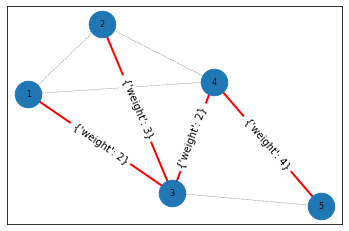

In [16]:
#networkx implementation

T = nx.minimum_spanning_tree(G)
T.edges(data=True)

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw_networkx_nodes(T, pos, node_size=700, with_labels=True)

nx.draw_networkx_edges(G, pos, width=0.5, edge_color='grey', style='dashed')
nx.draw_networkx_edges(T, pos, width=2, edge_color='red')

nx.draw_networkx_labels(T, pos, font_size=8, font_family='sans-serif')
nx.draw_networkx_edge_labels(T, pos)

{(1, 3): Text(-0.25241634662858103, 0.11821200129829285, "{'weight': 2}"),
 (3, 4): Text(0.15840208992056168, -0.1548166322476741, "{'weight': 2}"),
 (3, 2): Text(-0.36933782489614053, -0.24406421904374995, "{'weight': 3}"),
 (4, 5): Text(0.6400781307226419, -0.17743986419509744, "{'weight': 4}")}

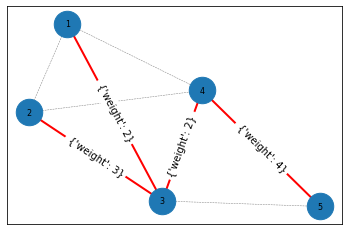

In [17]:
#implementation from scratch

T = mst_prim(G)
T.edges(data=True)

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw_networkx_nodes(T, pos, node_size=700, with_labels=True)

nx.draw_networkx_edges(G, pos, width=0.5, edge_color='grey', style='dashed')
nx.draw_networkx_edges(T, pos, width=2, edge_color='red')

nx.draw_networkx_labels(T, pos, font_size=8, font_family='sans-serif')
nx.draw_networkx_edge_labels(T, pos)

{(3, 2): Text(0.41406038121019867, -0.03595428240425885, "{'weight': 3}"),
 (4, 5): Text(-0.4512499941012943, -0.4379685583509324, "{'weight': 4}")}

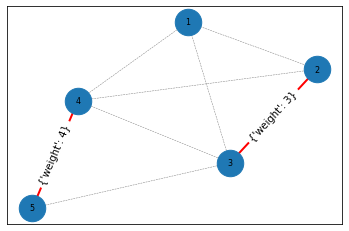

In [18]:
K = k_spanning_tree(G, 3)

pos = nx.spring_layout(G)  # positions for all nodes

nx.draw_networkx_nodes(K, pos, node_size=700, with_labels=True)

nx.draw_networkx_edges(G, pos, width=0.5, edge_color='grey', style='dashed')
nx.draw_networkx_edges(K, pos, width=2, edge_color='red')

nx.draw_networkx_labels(K, pos, font_size=8, font_family='sans-serif')
nx.draw_networkx_edge_labels(K, pos)

### (2) Implement the Highly Connected Subgraph Clustering including the Karger's MinCut Algorithm. Be sure to run Karger's MinCut algorithm multiple times to arrive at a good approx min-cut. Assume the given graph is unweighted . Test with the graph given in the lecture on Slide 2

In [19]:
#Karger's mincut algorithm, [min_cut value, [components] ]
def min_cut(G):
    
    #keep track of remaining edges
    cut_edges = [sorted(list(e)) for e in G.edges]
    CG_cut_edges = [sorted(list(e)) for e in G.edges]
    
    #Initialize contracted graph CG as copy of original graph
    CG = nx.MultiGraph(G)
    CompG = G.copy()
    
    #While there are more than 2 vertices in the contracted graph, 
    while(len(CG.nodes) > 2):
    
        #randomly pick an edge
        index = random.randint(0, len(CG_cut_edges)-1)
        CG_cut_edge = CG_cut_edges[index]
        
        edge_src = CG_cut_edge[0]
        edge_trg = CG_cut_edge[1]
        
        #merge nodes
        if not( edge_src == edge_trg ):
            CG = nx.contracted_edge(CG, CG_cut_edge, self_loops=False)
        
        CG_cut_edges.pop(index)
        cut_edges.pop(index)
        
        #update CG_cut_nodes list for all nodes referencing target, point store sorcce
        for e in CG_cut_edges:
            if e[0] == edge_trg:
                e[0] = edge_src
                
            if e[1] == edge_trg:
                e[1] = edge_src
               
    #remove self loop
    for e in CG_cut_edges:
        if e[0] == e[1]:
            idx = CG_cut_edges.index(e)
            CG_cut_edges.pop(idx)
            cut_edges.pop(idx)

    #get components
    for e in cut_edges:
        CompG.remove_edge(e[0], e[1])     
                        
    return {'min_cut': len(CG.edges), 'components': sorted(nx.connected_components(CompG), key = len, reverse=True)}
    
        

In [20]:
#Highly connected subgraph clustering
def hightly_connected_subgraph(G):
    subgraphs_to_process = [G]
    highly_connected_subgraphs = []
    
    while (len(subgraphs_to_process) > 0):
        
        S = subgraphs_to_process.pop(0)
        
        H_min_cut = min_cut(S)
        
        #run min_cut a few times to get a good approximum min_cut
        for i in range(30):
            H_min_cut_new = min_cut(S)
            if H_min_cut_new['min_cut'] < H_min_cut['min_cut']:
                H_min_cut = H_min_cut_new
        
        #for each component check if the subgraph is highly connected.
        for h_component in H_min_cut['components']:
            h = G.subgraph(h_component)      
            EC = len(h.edges)
            if (EC > len(h.nodes)/2.0):
                highly_connected_subgraphs.append(h)
            else:
                subgraphs_to_process.append(h)

    return highly_connected_subgraphs

### Testing with the graph given in the lecture on Slide 2

{0: Text(1.0, 6.622738357719982e-09, '0'),
 1: Text(0.7660444974899292, 0.6427875757217407, '1'),
 2: Text(0.17364825308322906, 0.9848077297210693, '2'),
 3: Text(-0.5, 0.8660253882408142, '3'),
 4: Text(-0.9396925568580627, 0.3420202136039734, '4'),
 5: Text(-0.9396925568580627, -0.3420201539993286, '5'),
 6: Text(-0.49999988079071045, -0.866025447845459, '6'),
 7: Text(0.1736481785774231, -0.9848077297210693, '7'),
 8: Text(0.7660443782806396, -0.642787754535675, '8')}

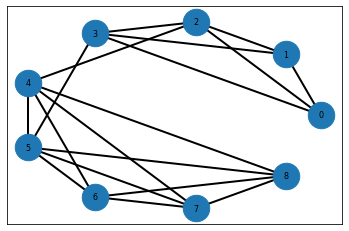

In [21]:
edge_list = [(0,1),(0,2),(0,3),
            (1,2), (1,3),
            (2,3),
            (2,4),
            (3,5),
            (4,5),(4,6),(4,7),(4,8),
            (5,6),(5,7),(5,8),
            (6,7),(6,8),
            (7,8)]
G = nx.Graph()

for x, y in edge_list: 
    G.add_edge(x, y)  # Ignore the weights

pos = nx.shell_layout(G)  # positions for all nodes

nx.draw_networkx_nodes(G, pos, node_size=700, with_labels=True)
nx.draw_networkx_edges(G, pos, width=2)
nx.draw_networkx_labels(G, pos, font_size=8, font_family='sans-serif')

In [22]:
h_min = min_cut(G)


for i in range(100):
    h_new = min_cut(G)
    if h_new['min_cut'] < h_min['min_cut']:
        h_min = h_new
print (h_min)
    

{'min_cut': 2, 'components': [{4, 5, 6, 7, 8}, {0, 1, 2, 3}]}


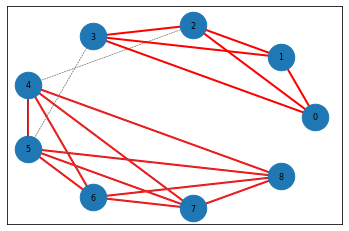

In [23]:
hs = hightly_connected_subgraph(G)

for g in hs:
    
    pos = nx.shell_layout(G)  # positions for all nodes

    nx.draw_networkx_nodes(g, pos, node_size=700, with_labels=True)
    nx.draw_networkx_edges(G, pos, width=0.5, edge_color='grey', style='dashed')
    nx.draw_networkx_edges(g, pos, width=2, edge_color='red')
    nx.draw_networkx_labels(g, pos, font_size=8, font_family='sans-serif')
    